# Анализ данных на Python

*Алла Тамбовцева*

## Визуализация с `seaborn` и статистическое оценивание с `scipy.stats`

### Подготовка к работе

В этом практикуме помимо привычных библиотек нам понадобится библиотека `seaborn`. Это надстройка над библиотекой `matplotlib` для более удобного построения графиков (больше возможностей для группировки и статистических графиков). Установим ее:

In [ ]:
!pip install seaborn

Импортируем библиотеки `pandas`, `seaborn` и модуль `stats` из библиотеки `scipy` для статистических тестов и работы с распределениями:

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats as st

Загрузим данные из файла `Cowles.csv`:

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/allatambov/PyPerm24/main/Cowles.csv")
data.head()

,Unnamed: 0,neuroticism,extraversion,sex,volunteer
0,1,16,13,female,no
1,2,8,14,male,no
2,3,5,16,male,no
3,4,8,20,female,no
4,5,9,19,male,no


В этом файле хранятся результаты опроса, переменные следующие:
    
* `neuroticism`: уровень невротизма (тревожность, эмоциональная неустойчивость);
* `extraversion`: уровень экстраверсии;
* `sex`: пол респондента;
* `volunteer`: участвует ли респондент в волонтерской деятельности или нет (`yes`, `no`).

### Количественные данные: cравниваем распределения и средние в двух группах

Изучим соотношение женщин и мужчин, участвующих и не участвующих волонтерской деятельности в данных:

In [3]:
print(data["sex"].value_counts())
print()
print(data["volunteer"].value_counts())

female    780
male      641
Name: sex, dtype: int64

no     824
yes    597
Name: volunteer, dtype: int64


То же, только в долях:

In [4]:
print(data["sex"].value_counts(normalize = True))
print()
print(data["volunteer"].value_counts(normalize = True))

female    0.548909
male      0.451091
Name: sex, dtype: float64

no     0.579873
yes    0.420127
Name: volunteer, dtype: float64


Сильного сдвига в сторону респондентов того или иного пола нет, женщин больше, но несильно. Если нас будут интересовать уровни экстраверсии/невротизма/степень участия в волонтерской деятельности, полученные результаты не будут искажены из-за того, что состав выборки неравномерный.

Выведем описательные статистики для уровня экстраверсии с группировкой по полу:

In [5]:
data.groupby("sex")["extraversion"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,780.0,12.421795,3.823485,2.0,10.0,13.0,15.0,23.0
male,641.0,12.313573,3.979630,2.0,9.0,13.0,15.0,22.0


Кстати, можно транспонировать для удобства:

In [6]:
data.groupby("sex")["extraversion"].describe().T

sex,female,male
count,780.000000,641.000000
mean,12.421795,12.313573
std,3.823485,3.979630
min,2.000000,2.000000
25%,10.000000,9.000000
50%,13.000000,13.000000
75%,15.000000,15.000000
max,23.000000,22.000000


Размах значений индекса экстраверсии у мужчин и женщин примерно одинаковый, разнообразие значений, если оценивать его по стандартному отклонению, у мужчин чуть выше. Различий в медианных значениях нет, средние тоже примерно одинаковы. Можно предположить, что различий в среднем уровне экстраверсии у мужчин и женщин нет.

Посмотрим на описательные статистики с разбиением по участию в волонтерстве:

In [7]:
data.groupby("volunteer")["extraversion"].describe().T

volunteer,no,yes
count,824.000000,597.000000
mean,11.962379,12.939698
std,3.834333,3.907021
min,2.000000,2.000000
25%,9.000000,11.000000
50%,12.000000,13.000000
75%,15.000000,16.000000
max,23.000000,22.000000


Тут различия чуть более заметные, и среднее, и медианное значение уровня экстраверсии у участвующих в волонтерской деятельности выше, что вполне логично. Вопрос, можно ли считать эту разницу в единицу статистически значимой, учитывая разброс значений? Ответим на него чуть позже, применив соответствующий статистический критерий, а пока посмотрим на распределение показателя `extraversion`. 

Выставим тему для всех последующих графиков с `seaborn`, выберем тему с белым фоном и добавленной координатной сеткой (подробнее про темы – [здесь](https://seaborn.pydata.org/generated/seaborn.set_theme.html)):

In [8]:
sns.set_theme(style = "whitegrid")

Построим гистограмму для столбца `extraversion` из датафрейма `data` с помощью [функции](https://seaborn.pydata.org/generated/seaborn.histplot.html) `histplot()`:

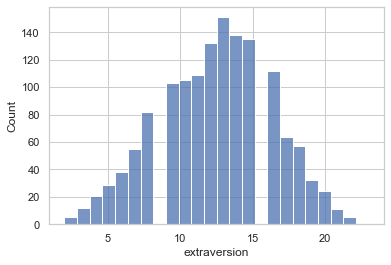

In [9]:
sns.histplot(data, x = "extraversion");

Распределение вполне симметричное (это ожидаемо, многие индексы на основе психологического анкетирования составляются таким образом, чтобы их распределение теоретически было похоже на нормальное), но со странными «зазорами» в окрестности 9 и 16. Однако ничего особенно странного в отсутствии некоторых столбцов нет: обычно за разные ответы в опросе начисляется разное число баллов, затем эти баллы суммируются, в итоге некоторую сумму баллов просто технически невозможно получить в силу устройства опроса. Можем увеличить шаг гистограммы и избавиться от этих зазоров:

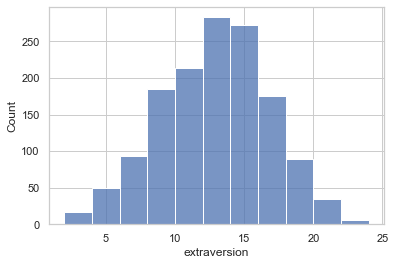

In [10]:
# здесь уже есть аргумент binwidth,
# более удобный, чем bins в matplotlib

sns.histplot(data, x = "extraversion", binwidth = 2);

Если нас интересует разделение по группам, можем добавить аргумент `hue` (цвет) и сделать цвет гистограммы зависимым от участия в волонтерской деятельности:

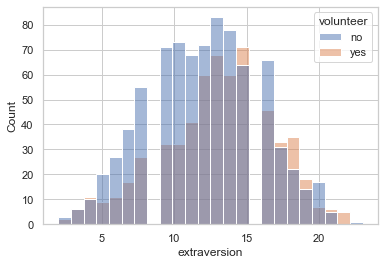

In [11]:
sns.histplot(data, x = "extraversion", 
             hue = "volunteer");

В целом, за счет прозрачности график выглядит довольно понятно, видно, что распределения уровня экстраверсии у не-волонтеров и волонтеров похожи, однако у вторых медиана выше, график немного сдвинут вправо. 

Для большей наглядности иногда переходят к другому типу графика – сглаженному графику плотности. Его можно построить, используя функцию `kdeplot()`, от *kernel density estimation*:

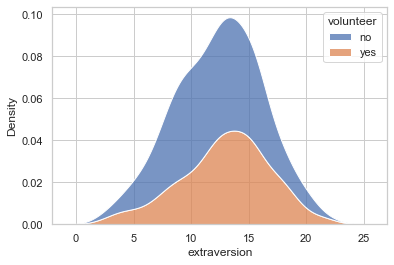

In [12]:
# multiple = "stack" гарантирует заливку,
# без этого аргумента здесь будут только линии

sns.kdeplot(data, 
            x = "extraversion", 
            hue = "volunteer", 
            multiple = "stack");

На этом графике тоже можно заметить небольшую разницу в медианах, плюс, явно видно, что волонтеров меньше, чем не-волонтеров. У сглаженных графиков плотности (оценка функции плотности по выборке) помимо преимущества в виде большей наглядности есть два недостатка:

* при маленьком объеме выборки ($n < 30$) график может вводить в заблуждение, так как сглаживание происходит не совсем точно, как обычно, выборочное оценивание в таком случае связано с рядом проблем;

* при наличии участков на числовой оси, в которые не попадает ни одно наблюдение (те самые «зазоры» на гистограмме), график может вводить в заблуждение, потому что при сглаживании плотности мы не увидим, что наблюдений на самом деле нет и что плотность там 0.

Можем для удобства разбить данные на группы и построить два графика в разных окнах (иногда их называют фасетками, как калька от *facets*), для этого понадобится более общая [функция](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) `displot()` от *distribution plot*:

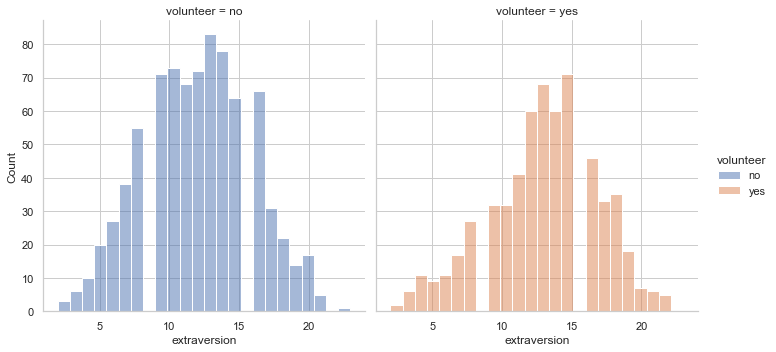

In [13]:
# col - столбцы в сетке графиков
# хотим один график для no и один для yes в volunteer

sns.displot(data, x = "extraversion", 
            hue = "volunteer", 
            col = "volunteer");

По умолчанию строятся гистограммы (и уже с вполне разумными подписями и легендой, что прекрасно), но можем добавить аргумент `kind` и построить графики плотности:

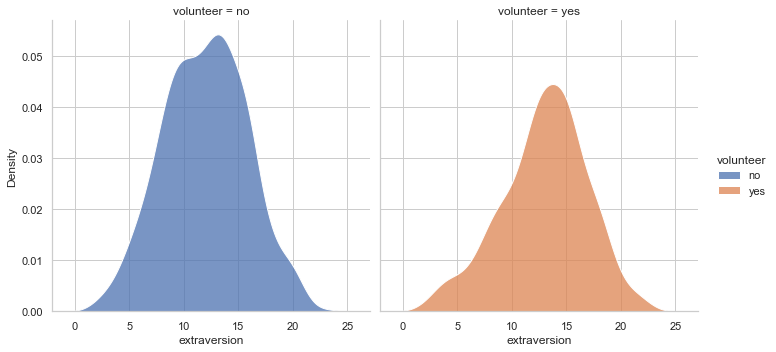

In [14]:
sns.displot(data, 
            x = "extraversion", 
            hue = "volunteer", 
            col = "volunteer", 
            kind = "kde",
            multiple = "stack");

В завершение знакомства с функцией `displot()` сделаем группировку сразу по двум признакам – по строкам будет группировка по полу, по столбцам – по участию в волонтерстве:

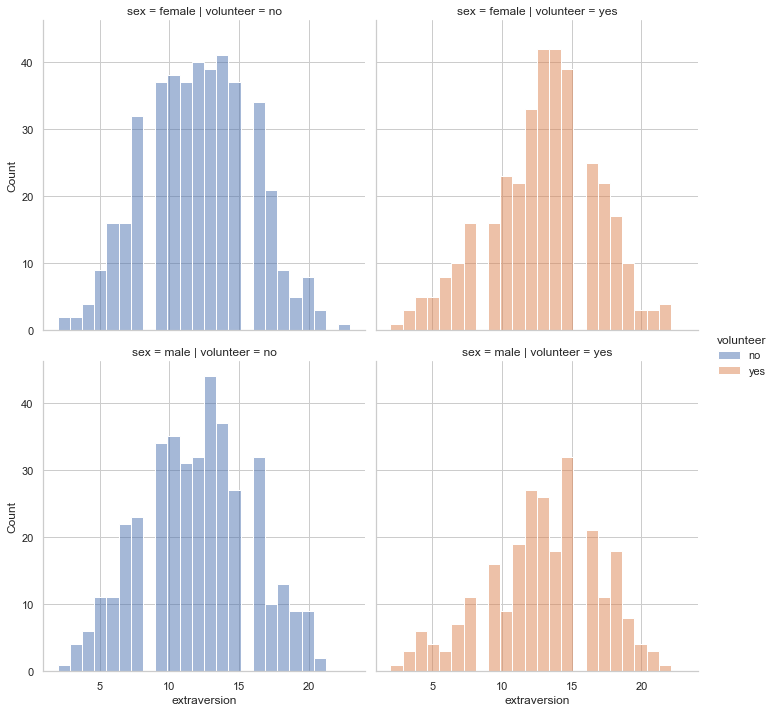

In [15]:
# сетка два на два = четыре группы
# гистограммы для каждой отдельно

sns.displot(data, x = "extraversion", 
            hue = "volunteer", 
            col = "volunteer",
            row = "sex");

### Количественные данные: доверительный интервал для среднего

Среднее значение индекса экстраверсии для волонтеров равно 12.94, а для не-волонтеров равно 11.96. При этом мы понимаем, что эти средние – просто оценки, полученные на конкретной выборке респондентов ($n = 1421$), которых опрашивали исследователи. На других выборках такого же объема средние могут быть другими, так как в выборки попадут другие люди. Чтобы учесть эту неопределенность и получить более универсальный, более общий результат, мы можем вычислить стандартную ошибку среднего:

$$
\text{se} = \frac{s}{\sqrt{n}},
$$

где $s$ – выборочное стандартное отклонение, $n$ – объем выборки.

Эта ошибка показывает, насколько, в среднем, выборочное среднее может изменяться от выборки к выборке при условии, что выборки будут одинакового объема $n$. В разных библиотеках Python есть функции, которые позволяют вычислить стандартную ошибку среднего, но так как считается она довольно просто, мы ее вычислим без импорта вспомогательных библиотек или модулей. Для начала зафиксируем все необходимые характеристики по группам:

In [16]:
tab = data.groupby("volunteer")["extraversion"].agg(["count", "mean", "std"])
tab

,count,mean,std
volunteer,,,
no,824,11.962379,3.834333
yes,597,12.939698,3.907021


Извлечем из полученной таблицы объемы выборок, средние и стандартные отклонения:

In [17]:
n1 = tab.loc["no", "count"]
n2 = tab.loc["yes", "count"]

mean1 = tab.loc["no", "mean"]
mean2 = tab.loc["yes", "mean"]

s1 = tab.loc["no", "std"]
s2 = tab.loc["yes", "std"]

Вычислим стандартные ошибки среднего и выведем результаты:

In [18]:
se1 = s1 / n1 ** 0.5
se2 = s2 / n2 ** 0.5

print(round(mean1, 2), "±", round(se1, 2))
print(round(mean2, 2), "±", round(se2, 2))

11.96 ± 0.13
12.94 ± 0.16


Итак, теперь мы можем считать, что средние значения уровня экстраверсии могут отличаться от тех, что мы получили на конкретных выборках не-волонтеров и волонтеров, в среднем, на 0.13 и 0.16. Если вспомнить про эмпирическое правило трех сигм, мы сможем рассмотреть интервал 

$$
\text{mean} \pm 3 \times \text{se}
$$

и найти границы, в которых в 99.8% случаев может лежать среднее выборки. А можем выбрать фиксированную вероятность – степень уверенности в результатах, уровень доверия, и построить доверительный интервал для среднего.

Вспомним, как вычисляются границы доверительного интервала для среднего:

$$
\bar{x} \pm t^* \times \text{se},
$$

где $\bar{x}$ – среднее, полученное по выборке, $t^*$ – t-значение из распределения Стьюдента, соответствующее выбранному уровню доверия, $\text{se}$ – стандартная ошибка среднего. 

В модуле `stats` в подмодуле `t` для работы с распределением Стьюдента есть функция `interval()`, которая вычисляет границы симметричного интервала, в который значения попадают с заданной вероятностью. Другими словами, эта функция принимает на вход уровень доверия, значение среднего и стандартной ошибки, число степеней свободы (иначе распределение Стьюдента не будет задано однозначным образом), вычисляет $t^*$ в формуле выше и возвращает границы полученного интервала. 

Построим 95%-ный доверительный интервал для средних по группам:

In [19]:
# число степеней свободы df = n - 1
# так всегда при работе с одним средним
# это число наблюдений, которого достаточно для восстановления
# информации о распределении, если среднее известно

print(st.t.interval(0.95, loc = mean1, scale = se1, df = n1 - 1))
print(st.t.interval(0.95, loc = mean2, scale = se2, df = n2 - 1))

(11.70019026789495, 12.224567013658447)
(12.625655201134919, 13.253741783789703)


Итак, с 95%-ной уверенностью можно утверждать, что среднее значение индекса экстраверсии для не-волонтеров лежит в интервале от 11.7 до 12.22, а среднее значение индекса экстраверсии для волонтеров – в интервале от 12.63 до 13.25. 

*Примечание.* Так как доверительные интервалы не пересекаются, на 95%-ном уровне доверия (5%-ном уровне значимости) можно считать, что средние значения уровня экстраверсии в двух группах различаются. Однако, если бы они пересекались, однозначного вывода об отсутствии различий сделать было бы нельзя, для оценки нужно понять величину пересечения и перейти к явной проверке гипотез.

### Количественные данные: проверка гипотезы о равенстве средних

Разделим наши данные на две группы явно – отфильтруем соответствующие строки в отдельные датафреймы и заберем оттуда столбец `extraversion`:

In [20]:
one = data[data["volunteer"] == "no"]["extraversion"]
two = data[data["volunteer"] == "yes"]["extraversion"]

Проверим с помощью двухвыборочного критерия Стьюдента для независимых выборок (*two sample t-test*) гипотезу о равенстве среднего уровня экстраверсии у волонтеров и не-волонтеров:

$$
H_0: \mu_1 = \mu_2
$$

Функция `ttest_ind()` (от *t-test for independent samples*):

In [21]:
# на входе две выборки – два столбца/массива/списка

st.ttest_ind(one, two)

Ttest_indResult(statistic=-4.704762015195624, pvalue=2.7894522770530837e-06)

Функция возвращает наблюдаемое значение статистики критерия и p-value. Если примем стандартный уровень значимости 5%, нулевую гипотезу следует отвергнуть (p-value < 0.05). Альтернативная гипотеза по умолчанию двусторонняя, то есть, отвергая $H_0$ мы автоматически соглашаемся на альтернативу $H_1: \mu_1 \ne \mu_2$, то есть делаем вывод, что средние не равны.

Если мы хотим выбрать одностороннюю альтернативу, то нужно определиться с ее направлением. По идее, направление нужно выбирать из теоретических ожиданий (первое среднее болььше второго или наоборот), но часто его выбирают, исходя из данных. В нашем случае среднее значение `extraversion` у волонтеров выше (и это логично с содержательной точки зрения), поэтому альтернатива будет такой:

$$
H_1: \mu_1 < \mu_2
$$

В функции `ttest_ind()` можно добавить аргумент для типа альтернативы:

In [22]:
# по умолчанию two-sided
# less для <
# greater для >

st.ttest_ind(one, two, alternative = "less")

Ttest_indResult(statistic=-4.704762015195624, pvalue=1.3947261385265418e-06)

Нулевая гипотеза по-прежнему отвергается. Так как t-распределение симметрично относительно 0, p-value при переходе к односторонней альтернативе получилось в два раза меньше (хотя здесь оно примерно 0, после округления мы этого не заметим).

### Качественные данные: сравниваем частоты и доли в двух группах

Изучим соотношение респондентов из разных категорий:

In [23]:
# группируем по полу и считаем no/yes в volunteer

data.groupby("sex")["volunteer"].value_counts()

sex     volunteer
female  no           431
        yes          349
male    no           393
        yes          248
Name: volunteer, dtype: int64

Результат выше – объект `Series`, преобразуем его в датафрейм:

In [24]:
tab = pd.DataFrame(data.groupby("sex")["volunteer"].value_counts())
tab

volunteer
sex    volunteer           
female no               431
       yes              349
male   no               393
       yes              248

Получили датафрейм с мультииндексом – индекс строки состоит из двух частей, категория `sex` и `volunteer`. Для некоторых задач это может быть удобно, для некоторых – не очень. Если мы хотим вынести эти индексы в отдельные столбцы `sex` и `volunteer`, нам нужно сначала переименовать столбец `volunteer` (чтобы потом не получилось два одинаковых, это вызовет ошибку), а затем применить метод `.reset_index()`:

In [25]:
tab.rename(columns = {"volunteer" : "counts"}, inplace = True)

# выносим в столбцы оба индекса
# уровень 0 – sex выше
# уровень 1 – volunteer выше

fin = tab.reset_index(level = [0, 1])
fin

,sex,volunteer,counts
0,female,no,431
1,female,yes,349
2,male,no,393
3,male,yes,248


Такую таблицу можем уже использовать для построения [столбиковой диаграммы](https://seaborn.pydata.org/generated/seaborn.barplot.html) по группам с помощью `seaborn`:

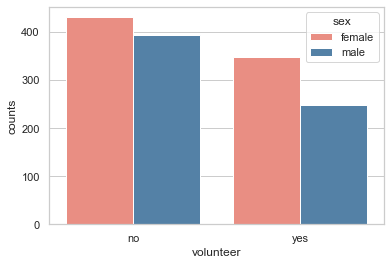

In [26]:
# по x ответы yes/no в volunteer
# по y частоты из counts
# в hue группировка по полу
# в palette своя палитра цветов

sns.barplot(fin, 
            x = "volunteer", 
            y = "counts", 
            hue = "sex",
            palette = ["salmon", "steelblue"]);

Для дальнейшей работы и перехода к долям нам понадобятся число мужчин и женщин среди респондентов:

In [27]:
data["sex"].value_counts()

female    780
male      641
Name: sex, dtype: int64

Извлечем частоты по отдельности:

In [28]:
n_female = data["sex"].value_counts()["female"]
n_male = data["sex"].value_counts()["male"]
print(n_female, n_male)

780 641


Вычислим доли волонтеров и не-волонтеров среди женщин и мужчин:

In [29]:
# normalize = True

res = data.groupby("sex")["volunteer"].value_counts(normalize = True)
res

sex     volunteer
female  no           0.552564
        yes          0.447436
male    no           0.613105
        yes          0.386895
Name: volunteer, dtype: float64

Извлечем доли волонтеров среди женщин и мужчин, задействуем два ключа сразу, поскольку `res` – последовательность pandas с мультииндексом:

In [30]:
p_female = res["female"]["yes"]
p_male = res["male"]["yes"]
print(p_female, p_male)

0.44743589743589746 0.3868954758190328


### Количественные данные: доверительный интервал для доли

По аналогии со средним, мы можем вычислить стандартную ошибку доли:

$$
\text{se} = \frac{\sqrt{\hat{p}(1 - \hat{p})}}{\sqrt{n}},
$$

где $\hat{p}$ – выборочная доля, $n$ – объем выборки.

Эта ошибка показывает, насколько, в среднем, выборочная доля может изменяться от выборки к выборке при условии, что выборки будут одинакового объема $n$. Вычислим стандартные ошибки доли волонтеров для двух групп:

In [31]:
se_female = (p_female * (1 - p_female) / n_female) ** 0.5
se_male = (p_male * (1 - p_male) / n_male) ** 0.5
print(se_female, se_male)

0.017803666257465586 0.019236899288686132


Итого получим следующие оценки доли волонтеров среди женщин и мужчин:

In [32]:
print(round(p_female, 2), "±", round(se_female, 2))
print(round(p_male, 2), "±", round(se_male, 2))

0.45 ± 0.02
0.39 ± 0.02


Теперь вспомним, как вычисляются границы доверительного интервала для доли:

$$
\hat{p} \pm z^* \times \text{se},
$$

где $\hat{p}$ – среднее, полученное по выборке, $z^*$ – z-значение из стандартного нормального распределения, соответствующее выбранному уровню доверия, $\text{se}$ – стандартная ошибка доли. 

В модуле `stats` в подмодуле `norm` для работы с нормальным распределением есть функция `interval()`, которая вычисляет границы симметричного интервала, в который значения попадают с заданной вероятностью. Другими словами, эта функция принимает на вход уровень доверия, значение доли и стандартной ошибки, вычисляет $z^*$ в формуле выше и возвращает границы полученного интервала. 

Построим 90%-ный доверительный интервал для долей по группам:

In [33]:
print(st.norm.interval(0.90, loc = p_female, scale = se_female))
print(st.norm.interval(0.90, loc = p_male, scale = se_male))

(0.41815147241927164, 0.47672032245252327)
(0.35525359225273717, 0.4185373593853284)


Итак, с 90%-ной уверенностью можно утверждать, что процент волонтеров среди женщин лежит в интервале от 42% до 48%, а процент волонтеров среди мужчин лежит в интервале от 36% до 42%. 


*Примечание.* Доверительные интервалы чуть-чуть накладываются друг на друга, тут без формальной проверки гипотез наличие статистически значимой разницы не выяснить.

### Качественные данные: проверка гипотезы о равенстве долей

Так как с долями обычно работа устроена чуть более заморочено, чем со средними, для проверки гипотезы о равенстве долей понадобится отдельная функция `proportions_ztest()`, но не из модуля `stats` библиотеки `scipy`, а из модуля `stats` библиотеки `statsmodels`:

In [34]:
from statsmodels.stats.proportion import proportions_ztest

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Итак, проверяем следующую нулевую гипотезу против двусторонней альтернативы:

$$
H_0: p_1 = p_2
$$
$$
H_1: p_1 \ne p_2
$$

Запускаем проверку, функция `proportions_ztest()` принимает на вход число успехов (число ответов `yes` в каждой из групп в нашем случае) и объемы выборок (число мужчин и женщин здесь):

In [35]:
# конечно, число ответов yes можно посчитать автоматически
# здесь просто числа
# аргумент alternative тоже есть, см help

proportions_ztest(count = [349, 248], 
                  nobs = [n_female, n_male])

(2.3007425520686606, 0.021406187349667836)

Итак, наблюдамое значение статистики равно 2.3, p-value примерно 0.02. Если выберем стандартный уровень значимости $\alpha = 5\%$, нулевую гипотезу о равенстве долей отвергнем, доли волонтеров среди женщин и мужчин не равны.

### Дополнение: еще немного про мультииндексы

Вернемся к таблице `res`:

In [36]:
res

sex     volunteer
female  no           0.552564
        yes          0.447436
male    no           0.613105
        yes          0.386895
Name: volunteer, dtype: float64

Объект `res` – последовательность pandas с мультииндексами. Посмотрим на них:

In [37]:
print(res.index)

MultiIndex([('female',  'no'),
            ('female', 'yes'),
            (  'male',  'no'),
            (  'male', 'yes')],
           names=['sex', 'volunteer'])


Объект `MultiIndex`, так как здесь два уровня индексов (`sex` и `volunteer`) внутри – пары. 
Извлечение отдельных элементов производится по парам:

In [38]:
# сразу парой через loc
res.loc[("female", "yes")]

0.44743589743589746

In [39]:
# через два ключа
res["female"]["yes"]

0.44743589743589746

Можно извлечь названия категорий на разных уровнях индексов: 

In [40]:
# уровень 0 – здесь пол
print(res.index.get_level_values(0))

# уровень 1 – здесь волонтерство
print(res.index.get_level_values(1))

Index(['female', 'female', 'male', 'male'], dtype='object', name='sex')
Index(['no', 'yes', 'no', 'yes'], dtype='object', name='volunteer')


А можно сделать срез по какому-то из уровней через метод `.xs()`:

In [41]:
# значение female в уровне 0 (пол)

res.xs('female', level = 0)

volunteer
no     0.552564
yes    0.447436
Name: volunteer, dtype: float64

In [42]:
# значение yes в уровне 1 (волонтерство)

res.xs('yes', level = 1)

sex
female    0.447436
male      0.386895
Name: volunteer, dtype: float64

In [43]:
res.xs('yes', level = 1) * 100

sex
female    44.743590
male      38.689548
Name: volunteer, dtype: float64